# Get Unique Flagellins across biomes

#### Load libraries

In [1]:
library(plyr)
library(tidyverse)
library(stringr)
library(phyloseq)
library(microViz)
library(metagMisc)
library(ggplot2)
library(ggsci)
library(viridis)
library(conflicted)
library(gridExtra)
library(permute)
library(grid) 
library(knitr)
library(cowplot)
library(vegan)
library(ggpubr)

── Attaching packages ──────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.0     ✔ stringr 1.5.1
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ─────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::desc()      masks plyr::desc()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()

microViz version 0.9.6 - Copyright (C) 2022 David Barnett
* Website: https://david-barnett.github.io/microViz/
* Useful? For cita

#### Declare conflict preferences

In [2]:
conflict_prefer("filter","dplyr")
conflict_prefer("rename","dplyr")
conflict_prefer("mutate","dplyr")
conflict_prefer("count","dplyr")

[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::rename over any other package.
[conflicted] Will prefer dplyr::mutate over any other package.
[conflicted] Will prefer dplyr::count over any other package.


In [13]:
#Import miscellaneous functions for plots and edger
source("/ebio/abt3_projects2/Flagellin_Diversity/code/notebooks/FlagellinDiversity/plots_functions.r")

In [77]:
filterTaxa_All = readRDS("filter_taxa_All_subsampled_median.rds")#,#"filter_taxa_All_count_subsampled.median.rds")

In [5]:
taxonomy.db  = read_tsv("../flagellin_phylogeny/fla.sb.taxonomy.length.tsv")

Rows: 9963 Columns: 13
── Column specification ─────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (9): Accession, ncbi_phylum, Domain, Phylum, Class, Order, Family, Genus...
dbl (4): length, HVR_length, ncbi_taxid, genome_size

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
#Create individual subsets of phyloseq objects for each category
ps.animals=subset_samples(filterTaxa_All,category=="Animal")
ps.plants=subset_samples(filterTaxa_All,category=="Plants")
ps.env=subset_samples(filterTaxa_All,category=="Environmental")

In [7]:
length(sample_names(ps.env))

[1] 99

In [14]:
#Create counts matrix with summary stats
counts.animals = createCountsMatrix(ps.animals)  
counts.env = createCountsMatrix(ps.env)
counts.plants = createCountsMatrix(ps.plants)

In [15]:
#Join all matrices
countsAllBiomes = full_join(counts.animals,counts.env,by="Accession") %>%
       full_join(counts.plants)

Joining with `by = join_by(Accession)`


In [16]:
head(countsAllBiomes)

,Accession,category.x,totalCount_Animal,NoSamples.x,ProportionIn_Animal,PresentIn_Animal,category.y,totalCount_Environmental,NoSamples.y,ProportionIn_Environmental,PresentIn_Environmental,category,totalCount_Plants,NoSamples,ProportionIn_Plants,PresentIn_Plants
,<chr>,<chr>,<dbl>,<int>,<dbl>,<lgl>,<chr>,<dbl>,<int>,<dbl>,<lgl>,<chr>,<dbl>,<int>,<dbl>,<lgl>
1,WP_018305791.1,Animal,68,178,0.382022472,TRUE,Environmental,120,99,1.2121212,TRUE,Plants,15,75,0.20000000,TRUE
2,KJS48310.1,Animal,1,178,0.005617978,TRUE,Environmental,54,99,0.5454545,TRUE,Plants,4,75,0.05333333,TRUE
3,EHQ91627.1,Animal,1,178,0.005617978,TRUE,Environmental,18,99,0.1818182,TRUE,Plants,2,75,0.02666667,TRUE
4,KRE97958.1,Animal,4,178,0.022471910,TRUE,Environmental,38,99,0.3838384,TRUE,Plants,3,75,0.04000000,TRUE
5,WP_039230967.1,Animal,2,178,0.011235955,TRUE,Environmental,156,99,1.5757576,TRUE,Plants,11,75,0.14666667,TRUE
6,ESU34160.1,Animal,10,178,0.056179775,TRUE,Environmental,31,99,0.3131313,TRUE,Plants,5,75,0.06666667,TRUE


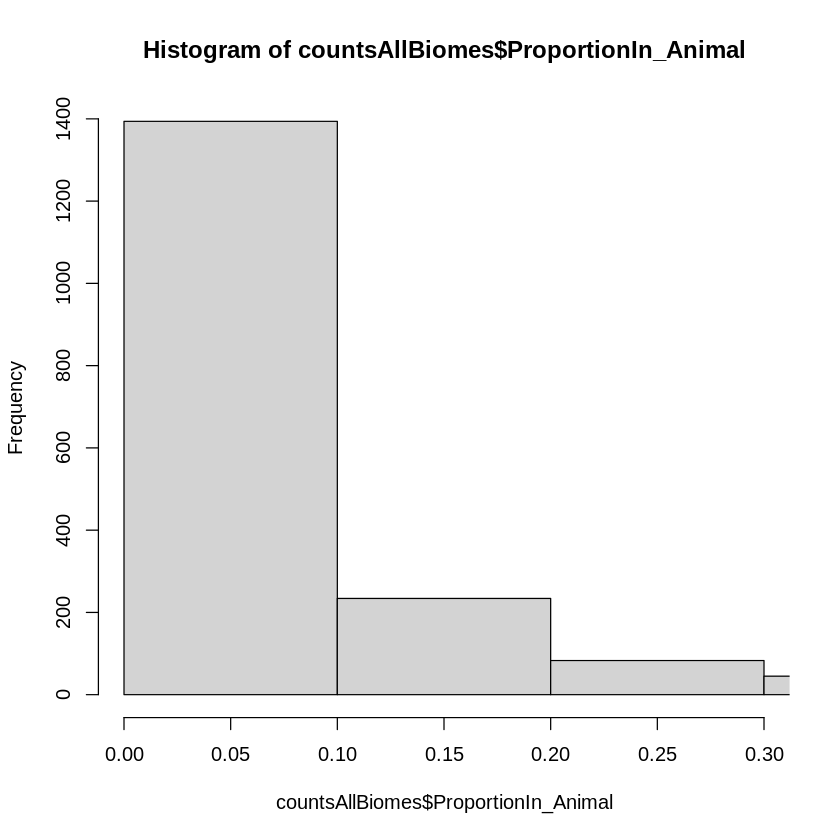

In [17]:
hist(countsAllBiomes$ProportionIn_Animal,breaks=2000,xlim=c(0,0.3))

In [18]:
#Check quantiles in proportion distribution
quantile(countsAllBiomes$ProportionIn_Animal,0.10)
quantile(countsAllBiomes$ProportionIn_Animal,0.25)
quantile(countsAllBiomes$ProportionIn_Animal,0.50)


10% 
0.005617978

25% 
0.01685393

50% 
0.03932584

In [19]:
#Check quantiles in proportion distribution
quantile(countsAllBiomes$ProportionIn_Environmental,0.10)
quantile(countsAllBiomes$ProportionIn_Environmental,0.25)
quantile(countsAllBiomes$ProportionIn_Environmental,0.50)


10% 
0.1111111

25% 
0.1919192

50% 
0.3131313

In [20]:
#Check quantiles in proportion distribution
quantile(countsAllBiomes$ProportionIn_Plants,0.10)
quantile(countsAllBiomes$ProportionIn_Plants,0.25)
quantile(countsAllBiomes$ProportionIn_Plants,0.50)


10% 
  0

25% 
0.02666667

50% 
0.05333333

### Identify unique flagellins in each biome from an all-to-all comparison

In [21]:
OnlyPlants = filter(countsAllBiomes,c(
                    ProportionIn_Environmental< quantile(countsAllBiomes$ProportionIn_Environmental,0.10) &
                    PresentIn_Animal == FALSE &
                    #ProportionIn_Animal < quantile(countsAllBiomes$ProportionIn_Animal,0.10) &
                    PresentIn_Plants == TRUE))%>%
                    mutate(UniqueIn = "Plants")


In [22]:
OnlyEnv = filter(countsAllBiomes,c(
                    PresentIn_Environmental == TRUE &
                    ProportionIn_Animal < quantile(countsAllBiomes$ProportionIn_Animal,0.10) &
                    ProportionIn_Plants < quantile(countsAllBiomes$ProportionIn_Plants,0.25)))%>%
                    mutate(UniqueIn = "Env")


In [23]:
#Here I reduced the threshold for environmental -more astringent-
OnlyAnimal = filter(countsAllBiomes,c(
                    PresentIn_Animal == TRUE &
                    PresentIn_Environmental == FALSE &
                    #ProportionIn_Environmental < quantile(countsAllBiomes$ProportionIn_Environmental,0.10) &
                    ProportionIn_Plants < quantile(countsAllBiomes$ProportionIn_Plants,0.25) ))%>%
                    mutate(UniqueIn = "Animal")

In [24]:
nrow(OnlyPlants)
nrow(OnlyEnv)
nrow(OnlyAnimal)

[1] 11

[1] 12

[1] 18

### Annotate unique flagellins taxonomy

In [25]:
uniqueSets = list(Animal=OnlyAnimal,Plants=OnlyPlants,Env=OnlyEnv)

getTaxonomy = function(setList){
    taxonomy.table = inner_join(setList,taxonomy.db,by="Accession")
    
    return(taxonomy.table)
}

taxUnique = lapply(uniqueSets,getTaxonomy)
taxUniqueAll = bind_rows(taxUnique)

In [70]:
taxUnique$Env

Accession,category.x,totalCount_Animal,NoSamples.x,ProportionIn_Animal,PresentIn_Animal,category.y,totalCount_Environmental,NoSamples.y,ProportionIn_Environmental,⋯,ncbi_taxid,ncbi_phylum,Domain,Phylum,Class,Order,Family,Genus,Species,genome_size
<chr>,<chr>,<dbl>,<int>,<dbl>,<lgl>,<chr>,<dbl>,<int>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
WP_025409266.1,Animal,0,178,0,FALSE,Environmental,26,99,0.2626263,⋯,861299,Gemmatimonadetes,d__Bacteria,p__Gemmatimonadota,c__Gemmatimonadetes,o__Gemmatimonadales,f__Gemmatimonadaceae,g__Gemmatirosa,s__Gemmatirosa kalamazoonesis,7479215
WP_019646457.1,Animal,0,178,0,FALSE,Environmental,39,99,0.3939394,⋯,189,Proteobacteria,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodospirillales,f__Rhodospirillaceae,g__Novispirillum,s__Novispirillum itersonii_A,4464517
WP_062014281.1,Animal,0,178,0,FALSE,Environmental,24,99,0.2424242,⋯,1638163,Proteobacteria,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,f__Rhizobiaceae,g__Aureimonas,s__Aureimonas sp001463765,4496098
KZL24862.1,Animal,0,178,0,FALSE,Environmental,34,99,0.3434343,⋯,989422,Proteobacteria,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,f__Stappiaceae,g__Pseudovibrio,s__Pseudovibrio sp001623075,5875058
GBF57702.1,Animal,0,178,0,FALSE,Environmental,119,99,1.2020202,⋯,1445552,Proteobacteria,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Caulobacterales,f__Hyphomonadaceae,g__Phycosocius,s__Phycosocius bacilliformis,3332539
WP_115593367.1,Animal,0,178,0,FALSE,Environmental,61,99,0.6161616,⋯,1938339,Proteobacteria,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Alteromonadaceae,g__Alteromonas_D,s__Alteromonas_D aestuariivivens,3848892
PYE32768.1,Animal,0,178,0,FALSE,Environmental,74,99,0.7474747,⋯,263723,Proteobacteria,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Alteromonadaceae,g__Idiomarina,s__Idiomarina fontislapidosi,2862757
SER07934.1,Animal,0,178,0,FALSE,Environmental,130,99,1.3131313,⋯,355243,Proteobacteria,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Nitrincolaceae,g__Amphritea,s__Amphritea atlantica,4735181
ALA90499.1,Animal,0,178,0,FALSE,Environmental,26,99,0.2626263,⋯,40324,Proteobacteria,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Xanthomonadales,f__Xanthomonadaceae,g__Stenotrophomonas,s__Stenotrophomonas sp003086775,4300149


### Filter and export sequences from unique flagellins

In [27]:
library(seqinr)

In [28]:
#Flagellin multifasta
flagellins.markers.sb=seqinr::read.fasta("/ebio/abt3_projects/small_projects/aborbon/Thesis_FlagellinDiversity/1_shortbred/out.finalmap.faa",seqtype="AA")

In [29]:
categoriesToExport = c("Animal","Plants","Env")

In [387]:
for (category in categoriesToExport) {
  output_file <- paste("edgeR/subsampled_opt1/uniqueFlagellinsBiome/uniqueFla_", category, ".faa", sep = "")
  export_sequences_to_fasta(sequence_fasta = flagellins.markers.sb,
                            seqList = taxUnique,
                            category = category,
                            output_file = output_file)
}

In [423]:
write_lines(taxUnique$Env$Accession,"edgeR/subsampled_opt1/uniqueFlagellinsBiome/uniqueFla_Accession_Env.tsv")

In [30]:
head(taxUniqueAll)

,Accession,category.x,totalCount_Animal,NoSamples.x,ProportionIn_Animal,PresentIn_Animal,category.y,totalCount_Environmental,NoSamples.y,ProportionIn_Environmental,⋯,ncbi_taxid,ncbi_phylum,Domain,Phylum,Class,Order,Family,Genus,Species,genome_size
,<chr>,<chr>,<dbl>,<int>,<dbl>,<lgl>,<chr>,<dbl>,<int>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,WP_022758790.1,Animal,111,178,0.6235955,TRUE,Environmental,0,99,0,⋯,831,Firmicutes,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__Pseudobutyrivibrio,s__Pseudobutyrivibrio fibrisolvens_A,3164379
2,ONG15595.1,Animal,479,178,2.6910112,TRUE,Environmental,0,99,0,⋯,562,Proteobacteria,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Escherichia,s__Escherichia coli_D,5232730
3,EGC94816.1,Animal,941,178,5.2865169,TRUE,Environmental,0,99,0,⋯,981367,Proteobacteria,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Escherichia,s__Escherichia fergusonii,4866106
4,CBL40883.1,Animal,155,178,0.8707865,TRUE,Environmental,0,99,0,⋯,245014,Firmicutes,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__CAG-81,s__CAG-81 sp900066535,3601020
5,OUP02704.1,Animal,328,178,1.8426966,TRUE,Environmental,0,99,0,⋯,1965587,Firmicutes,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Oscillospirales,f__Acutalibacteraceae,g__Hydrogeniiclostridium,s__Hydrogeniiclostridium sp002160025,3721138
6,OLR54261.1,Animal,58,178,0.3258427,TRUE,Environmental,0,99,0,⋯,1261634,Firmicutes,d__Bacteria,p__Firmicutes_A,c__Clostridia,o__Lachnospirales,f__Lachnospiraceae,g__14-2,s__14-2 sp001940225,3360661


In [31]:
allUnique = flagellins.markers.sb[c(which(names(flagellins.markers.sb)%in%taxUniqueAll$Accession))]
write.fasta(sequences=allUnique,names=names(allUnique),nbchar=80,file.out="edgeR/subsampled_opt1/uniqueFlagellinsBiome/allunique.faa")

In [32]:
names(taxUniqueAll)

[1] "Accession"                  "category.x"                
 [3] "totalCount_Animal"          "NoSamples.x"               
 [5] "ProportionIn_Animal"        "PresentIn_Animal"          
 [7] "category.y"                 "totalCount_Environmental"  
 [9] "NoSamples.y"                "ProportionIn_Environmental"
[11] "PresentIn_Environmental"    "category"                  
[13] "totalCount_Plants"          "NoSamples"                 
[15] "ProportionIn_Plants"        "PresentIn_Plants"          
[17] "UniqueIn"                   "length"                    
[19] "HVR_length"                 "ncbi_taxid"                
[21] "ncbi_phylum"                "Domain"                    
[23] "Phylum"                     "Class"                     
[25] "Order"                      "Family"                    
[27] "Genus"                      "Species"                   
[29] "genome_size"

In [138]:
count(taxUniqueAll,UniqueIn)

UniqueIn,n
<chr>,<int>
Animal,18
Env,12
Plants,11


In [139]:
names(taxUniqueAll)

[1] "Accession"                  "category.x"                
 [3] "totalCount_Animal"          "NoSamples.x"               
 [5] "ProportionIn_Animal"        "PresentIn_Animal"          
 [7] "category.y"                 "totalCount_Environmental"  
 [9] "NoSamples.y"                "ProportionIn_Environmental"
[11] "PresentIn_Environmental"    "category"                  
[13] "totalCount_Plants"          "NoSamples"                 
[15] "ProportionIn_Plants"        "PresentIn_Plants"          
[17] "UniqueIn"                   "length"                    
[19] "HVR_length"                 "ncbi_taxid"                
[21] "ncbi_phylum"                "Domain"                    
[23] "Phylum"                     "Class"                     
[25] "Order"                      "Family"                    
[27] "Genus"                      "Species"                   
[29] "genome_size"

In [141]:
colors.fam.unique = count(taxUniqueAll,Family) %>%
                    cbind(categorical_colors)

In [143]:
taxUniqueAll.cols = taxUniqueAll %>%
                    inner_join(colors.fam.unique,by="Family") %>%
                    select(Accession,categorical_colors,Family)%>%
                    mutate(Family=str_remove_all(Family,"f__"))

In [147]:
write_tsv(taxUniqueAll.cols,"../FlagellinDiversity/output_files/itol.colors.family.unique.tsv")

In [131]:
categorical_colors <- c(
  "#4E79A7", # Soft Blue
  "#F28E2B", # Muted Orange
  "#E15759", # Soft Red
  "#76B7B2", # Muted Teal
  "#59A14F", # Soft Green
  "#EDC948", # Muted Yellow
  "#B07AA1", # Soft Purple
  "#FF9DA7", # Soft Pink
  "#9C755F", # Muted Brown
  "#BAB0AC", # Soft Grey
  "#D37295", # Muted Pink
  "#A0CBE8", # Light Blue
  "#FFD92F", # Soft Yellow
  "#B6992D", # Olive Green
  "#499894", # Muted Green-Blue
  "#86BCB6"  # Soft Turquoise
)

In [136]:
scales::print_palette(categorical_colors)

ERROR: Error: 'print_palette' is not an exported object from 'namespace:scales'


In [405]:
write_tsv(taxUniqueAll,"edgeR/subsampled_opt1/uniqueFlagellinsBiome/allUnique_metadata.tsv")

In [85]:
colors.map = read_tsv("../FlagellinDiversity/Figures/colors.map.tsv")

Rows: 11 Columns: 2
── Column specification ─────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): biome, color

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [87]:
colors.map[1:4,]

biome,color
<chr>,<chr>
Environmental,#E64B35FF
Host-associated,#4DBBD5FF
Plants,#00A087FF
Animal,#3C5488FF


In [157]:
mean(filter(taxUniqueAll,UniqueIn=="Plants")$length)
mean(filter(taxUniqueAll,UniqueIn=="Animal")$length)
mean(filter(taxUniqueAll,UniqueIn=="Env")$length)

[1] 313.8182

[1] 360

[1] 417.1667

In [156]:
sd(filter(taxUniqueAll,UniqueIn=="Plants")$length)
sd(filter(taxUniqueAll,UniqueIn=="Animal")$length)
sd(filter(taxUniqueAll,UniqueIn=="Env")$length)

[1] 40.87742

[1] 108.1323

[1] 117.2975

In [128]:
figures_path = "/ebio/abt3_projects2/Flagellin_Diversity/code/notebooks/FlagellinDiversity/Figures"

In [148]:

pdf(file.path(figures_path,"Figure13A.pdf"), width = 6, height = 6)
my_comparisons = list(c("Animal","Env"),c("Animal","Plants"),c("Env","Plants"))

ggboxplot(data=taxUniqueAll, x = "UniqueIn", y = "length",
           xlab = "Unique in", ylab = "Sequence Length (AA)",
           fill="UniqueIn",
         alpha=0.8)+
stat_compare_means(comparisons = my_comparisons, mathod = "wilcox.test",label.y = c(600,635,640))+
stat_compare_means(label.y=700)+ 
    scale_fill_manual(values = c("Env"="#E64B35FF",
                                 "Animal"="#3C5488FF",
                                 "Plants"="#00A087FF"))+
geom_jitter(width=0.1,alpha=0.6)+
  theme_classic() +
  theme(text = element_text(size = 14),
        axis.text.x = element_text(angle = 0,size=14),
        legend.position = "none",
        plot.title = element_text(hjust = 0.5),
        plot.tag = element_text(size=20,face="bold"))+
labs(tag = "A")
dev.off()

Warning message in wilcox.test.default(c(393, 225, 495, 276, 528, 270, 273, 284, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(393, 225, 495, 276, 528, 270, 273, 284, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(540, 317, 555, 361, 274, 282, 273, 502, :
“cannot compute exact p-value with ties”


png 
  2

In [36]:
kruskal.test(data=taxUniqueAll, length~UniqueIn)


	Kruskal-Wallis rank sum test

data:  length by UniqueIn
Kruskal-Wallis chi-squared = 4.1682, df = 2, p-value = 0.1244


In [446]:
names(taxUniqueAll)

[1] "Accession"                  "category.x"                
 [3] "totalCount_Animal"          "NoSamples.x"               
 [5] "ProportionIn_Animal"        "PresentIn_Animal"          
 [7] "category.y"                 "totalCount_Environmental"  
 [9] "NoSamples.y"                "ProportionIn_Environmental"
[11] "PresentIn_Environmental"    "category"                  
[13] "totalCount_Plants"          "NoSamples"                 
[15] "ProportionIn_Plants"        "PresentIn_Plants"          
[17] "UniqueIn"                   "length"                    
[19] "HVR_length"                 "ncbi_taxid"                
[21] "ncbi_phylum"                "Domain"                    
[23] "Phylum"                     "Class"                     
[25] "Order"                      "Family"                    
[27] "Genus"                      "Species"                   
[29] "genome_size"

In [468]:
cor.test(formula = ~ genome_size + length,
         data = taxUniqueAll,
        subset = UniqueIn == "Animal")



	Pearson's product-moment correlation

data:  genome_size and length
t = 0.34641, df = 16, p-value = 0.7335
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3965639  0.5317315
sample estimates:
       cor 
0.08628049 


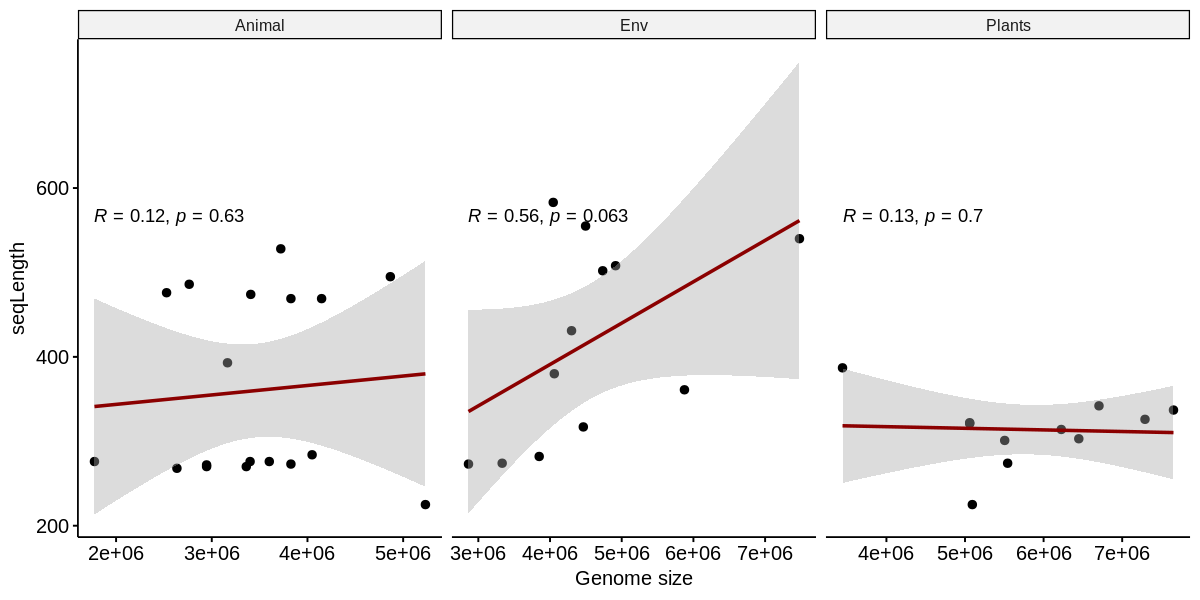

In [42]:
options(repr.plot.width=10,repr.plot.height=5)
ggscatter(taxUniqueAll, x ="genome_size", y= "length",
         add = "reg.line", conf.int = TRUE,
         cor.coef = TRUE, cor.method = "spearman",
         xlab = "Genome size", ylab="seqLength",
         add.params = list(color = "darkred",
                          fill = "darkgrey"))+facet_wrap(~UniqueIn,scales = "free_x")

In [445]:
#Summarize number of flagellins per species
#options(repr.plot.width = 6,repr.plot.height=10)
ggplot(count(taxUniqueAll,Genus,sort=TRUE)[1:50,],aes(y=reorder(Genus,n),x=n))+
geom_bar(stat="identity",width=0.7)+
theme_bw()+
theme(axis.text.x = element_text(size=15),
     axis.text.y = element_text(size=15))+
facet_wrap(~UniqueIn)

ERROR while rich displaying an object: Error in `combine_vars()`:
! At least one layer must contain all faceting variables: `UniqueIn`.
* Plot is missing `UniqueIn`
* Layer 1 is missing `UniqueIn`

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error 

## Within animals

In [66]:
## Get counts matrix from a phyloseq object, based on the category value           
createCountsMatrix = function(ps_object,mapping_variable){
    OTU1 = as(otu_table(ps_object),"matrix")
    #if(taxa_are_rows(ps_object)){OTU1 <- t(OTU1)}
    OTUdf = as.data.frame(OTU1)
    OTUdf = rownames_to_column(OTUdf,var="Accession")
    
    #Read metadata table from phyloseq object
    metadata = as_tibble(ps_object@sam_data)
    category.value = metadata$mapping_variable[1]
    print(category.value)
    
    #Read taxonomy table from phyloseq object
    #Finish this section: Create the vector with corresponding taxonomy for each accession, to further add to the output.table
    #taxonomy = as_tibble(ps_object@tax_table) %>%
     #          rownames_to_column(var = "Accession")
#    species = select(taxonomy,Species)
    
    #Create table and assign category
    output.table = mutate(OTUdf,totalCount= rowSums(across(where(is.numeric))))%>%
                mutate(category = category.value) %>%
                mutate(NoSamples = nrow(metadata)) %>%
                mutate(ProportionInCategory = totalCount/NoSamples) %>%
                mutate(PresentInCategory = ifelse(ProportionInCategory>0,TRUE,FALSE))%>%
                select(Accession,
                   mapping_variable,
                   totalCount,
                   NoSamples,
                   ProportionInCategory,
                   PresentInCategory)%>%
                rename_with(~paste0("ProportionIn_",category.value),ProportionInCategory)%>%
                rename_with(~paste0("PresentIn_",category.value),PresentInCategory)%>%
                rename_with(~paste0("totalCount_",category.value),totalCount)

    #mutate(category.table,ExtractCategorypresent = ifelse(rowSums(select(.,-c(Sample,category)))>0,TRUE,FALSE))
    
    return(output.table)
}

In [78]:
counts.mammals = createCountsMatrix(ps.mammals,biome_2)  

ERROR: Error in print(mapping_variable): object 'biome_2' not found


In [43]:
#Create individual subsets of phyloseq objects for each category
ps.mammals=subset_samples(filterTaxa_All,biome_2=="Mammalia")
ps.aves=subset_samples(filterTaxa_All,biome_2=="Aves")
ps.reptiles=subset_samples(filterTaxa_All,biome_2=="Reptilia")
ps.amphibia=subset_samples(filterTaxa_All,biome_2=="Amphibia")
ps.fish=subset_samples(filterTaxa_All,biome_2=="Actinopterygii")

In [76]:
counts.mammals = createCountsMatrix(ps.mammals,biome_2)  

ERROR: Error in print(mapping_variable): object 'biome_2' not found


In [53]:
#Create counts matrix with summary stats
counts.mammals = createCountsMatrix(ps.mammals,biome_2)  
counts.aves = createCountsMatrix(ps.aves,biome_2)
counts.reptiles = createCountsMatrix(ps.reptiles,biome_2)
counts.amphibia = createCountsMatrix(ps.amphibia,biome_2)
counts.fish = createCountsMatrix(ps.fish,biome_2)

Warning message:
“Unknown or uninitialised column: `mapping_variable`.”


ERROR: [1m[33mError[39m in `select()`:[22m
[33m![39m Can't subset columns that don't exist.
[31m✖[39m Column `category` doesn't exist.


In [51]:
counts.fish

Accession,category,totalCount_Animal,NoSamples,ProportionIn_Animal,PresentIn_Animal
<chr>,<chr>,<dbl>,<int>,<dbl>,<lgl>
WP_018305791.1,Animal,14,51,0.27450980,TRUE
KJS48310.1,Animal,1,51,0.01960784,TRUE
EHQ91627.1,Animal,0,51,0.00000000,FALSE
KRE97958.1,Animal,0,51,0.00000000,FALSE
WP_039230967.1,Animal,0,51,0.00000000,FALSE
ESU34160.1,Animal,2,51,0.03921569,TRUE
KMY55506.1,Animal,2,51,0.03921569,TRUE
WP_087615600.1,Animal,2,51,0.03921569,TRUE
WP_039042127.1,Animal,3,51,0.05882353,TRUE


In [47]:
#Join all matrices
countsAllAnimals = full_join(counts.mammals,counts.aves,by="Accession") %>%
       full_join(counts.reptiles,by="Accession")%>%
       full_join(counts.amphibia,by="Accession")%>%
       full_join(counts.fish,by="Accession")

In [49]:
#Check quantiles in proportion distribution
quantile(countsAllAnimals$ProportionIn_Animal.x,0.10)
quantile(countsAllAnimals$ProportionIn_Animal,0.25)
quantile(countsAllAnimals$ProportionIn_Animal,0.50)


10% 
  0

25% 
  0

50% 
  0

In [50]:
head(countsAllAnimals)

,Accession,category.x,totalCount_Animal.x,NoSamples.x,ProportionIn_Animal.x,PresentIn_Animal.x,category.y,totalCount_Animal.y,NoSamples.y,ProportionIn_Animal.y,⋯,category.y.y,totalCount_Animal.y.y,NoSamples.y.y,ProportionIn_Animal.y.y,PresentIn_Animal.y.y,category,totalCount_Animal,NoSamples,ProportionIn_Animal,PresentIn_Animal
,<chr>,<chr>,<dbl>,<int>,<dbl>,<lgl>,<chr>,<dbl>,<int>,<dbl>,⋯,<chr>,<dbl>,<int>,<dbl>,<lgl>,<chr>,<dbl>,<int>,<dbl>,<lgl>
1,WP_018305791.1,Animal,11,51,0.21568627,TRUE,Animal,40,51,0.78431373,⋯,Animal,3,11,0.27272727,TRUE,Animal,14,51,0.27450980,TRUE
2,KJS48310.1,Animal,0,51,0.00000000,FALSE,Animal,0,51,0.00000000,⋯,Animal,0,11,0.00000000,FALSE,Animal,1,51,0.01960784,TRUE
3,EHQ91627.1,Animal,0,51,0.00000000,FALSE,Animal,1,51,0.01960784,⋯,Animal,0,11,0.00000000,FALSE,Animal,0,51,0.00000000,FALSE
4,KRE97958.1,Animal,3,51,0.05882353,TRUE,Animal,1,51,0.01960784,⋯,Animal,0,11,0.00000000,FALSE,Animal,0,51,0.00000000,FALSE
5,WP_039230967.1,Animal,0,51,0.00000000,FALSE,Animal,2,51,0.03921569,⋯,Animal,0,11,0.00000000,FALSE,Animal,0,51,0.00000000,FALSE
6,ESU34160.1,Animal,5,51,0.09803922,TRUE,Animal,2,51,0.03921569,⋯,Animal,1,11,0.09090909,TRUE,Animal,2,51,0.03921569,TRUE


In [21]:
OnlyMammals = filter(countsAllBiomes,c(
                    ProportionIn_Environmental< quantile(countsAllBiomes$ProportionIn_Environmental,0.10) &
                    PresentIn_Animal == FALSE &
                    #ProportionIn_Animal < quantile(countsAllBiomes$ProportionIn_Animal,0.10) &
                    PresentIn_Plants == TRUE))%>%
                    mutate(UniqueIn = "Plants")
